# Chapter 01 - Exploratory Data Analysis

## Estimates of Location

Estimates of location express the data to a single summary value. They are based on some different concepts:

- Mean based location estimates:

$\bar{x} = \frac{\sum_{i=1}^n x_i}{n}$ (Mean) \
$\bar{x} = \frac{\sum_{i=p+1}^{n-p} x_i}{n-2p}$ (Trimmed Mean), where p is the number of smallest and largest values to be ommited. \
$\bar{x} = \frac{\sum_{i=1}^n w_i x_i}{\sum_{i=1}^n w_i}$ (Weighted Mean), where $w_i$ is the weight of each instance.

- Median and robust estimates:

Median: also known as the 50th percentile, is the middle number on a sorted list of data. If the number of records is even, then the median is the average between the two values that divide the dataset. \
Weighted median: Same as the median, but in this case, each value in the dataset has a weight, and the weighted median is the value such that the sum of the weights is equal for the lower and upper halves of the sorted list.

In [4]:
import numpy as np
import pandas as pd


In [2]:
state = pd.read_csv("../data/state.csv")

In [9]:
state.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [3]:
# mean
state["Population"].mean()

6162876.3

In [5]:
# trimmed mean
from scipy import stats

stats.trim_mean(state["Population"], 0.1)

4783697.125

In [7]:
# weighted mean
np.average(state["Murder.Rate"], weights=state["Population"])

4.445833981123393

In [6]:
# median
state["Population"].median()

4436369.5

## Estimates of Variability

Estimates of variability is the second most important dimension when summarizing a feature. Behind only the estimates of location themselves. Commonly, estimates of variability are based on different approaches:

- Standard Deviation and Related Estimates:

$\frac{\sum_{i=1}^{n} \lvert x_i - \bar{x} \rvert}{n}$ (Mean absolute deviation, or Manhattan distance) \
$s^2 = \frac{\sum_{i=1}^{n} (x_i - \bar{x})^2}{n-1}$ (Variance) \
$s = \sqrt{\text{Variance}}$ (Standard Deviation)

All those variability estimates are very sensible to outliers, especially the variance and the standard deviation. A more robust metric is the following:

$\text{Median}(\lvert x_1-m \rvert, \lvert x_2-m \rvert, \cdot\cdot\cdot, \lvert x_N-m \rvert)$, where $m$ is the median. (Median absolute devitation from the median, or MAD)

It is also possible to compute a trimmed standard deviation analogous to the trimmed mean.

- Estimates based on Percentiles

Range: The difference between the largest and the smallest numbers. \
Percentile: the Pth percentile is a value such that at least P percent of the values take on this value or less and at least (100 – P) percent of the values take on this value or more. \
Quantile: The quantile is exacly the same as the percentile, excepted that it is indexed by fractions (the 0.6 quantile is the 60th percentile). \
Interquartile Range (IQR): the difference between the 25th percentile and the 75th percentile.

In [10]:
# standard deviation
state["Population"].std()

6848235.347401142

In [11]:
# IQR
state["Population"].quantile(0.75) - state["Population"].quantile(0.25)

4847308.0

In [13]:
# median absolute deviation from the median
from statsmodels import robust

robust.scale.mad(state["Population"])

3849876.1459979336

In [14]:
# quantiles
state['Murder.Rate'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

## Exploring the Data Distribution

Common tools used to explore and visualize the data distribution are:

- Boxplots
- Frequency Table
- Histogram
- Density Plot

**Box Plots**

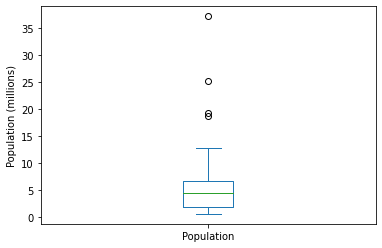

In [17]:
import matplotlib.pyplot as plt

# box plot
fig, ax = plt.subplots(1, 1)

ax = (state["Population"] / 1_000_000).plot.box()
ax.set_ylabel("Population (millions)")

plt.show()

The box represents represents the interquartile range, where the top box is the 75th percentile and the bottom box is the 25th percentile. The green line is the median. The lines outside the box represents the bulk of the distribution and they will now go further than **1.5 times the IQR**. Any data outside of the range of the lines are plotted as sinfle points or circles and are often considered as **outliers**.

**Frequency Tables and Histograms**

A frequency table divides up the data range into equally spaced segments.

In [19]:
# frequency table
binnedPopulation = pd.cut(state["Population"], 10)
binnedPopulation.value_counts()

(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: Population, dtype: int64

The tool to visualize a frequency table is by plotting a histogram of the data.

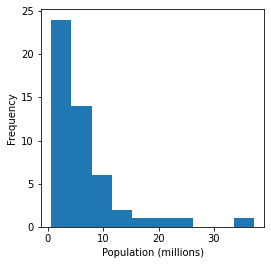

In [20]:
# histogram
fig, ax = plt.subplots(1, 1, figsize=(4, 4))

ax = (state["Population"] / 1_000_000).plot.hist()
ax.set_xlabel("Population (millions)")

plt.show()

The rules for plotting histograms are:
1. Empty bins are included in the graph.
2. Bins are of equal width.
3. The number of bins (or, equivalently, bin size) is up to the user.
4. Bars are contiguous—no empty space shows between bars, unless there is an empty bin.

**Density Plots and Estimates**

A density plot is closed related to a histogram. Basically, it shows a smoothed histogram, and is drawn from a function based on the data through a *kernel density estimation*.

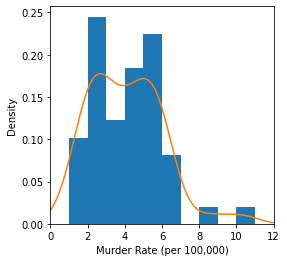

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))

ax = state["Murder.Rate"].plot.hist(density=True, xlim=[0, 12], bins=range(1, 12))
state["Murder.Rate"].plot.density(ax=ax)
ax.set_xlabel("Murder Rate (per 100,000)")

plt.show()

Note that in this case, the y-axis does not display the counts of elements on each bin like it is done in a histogram. Instead, the density plot show the proportion of the data under each point of the curve. Besides, instead of counts in bins, you calculate areas under the curve between any two points on the x-axis in order to compute the proportion of the distribution lying between those two points.